# Sentiment Analysis

This notebook provides some samples of the requests that can be made using the *SentimentAnalysis* class from the module *scripts/sentiment_analysis.py*.

*SentimentAnalysis* contains the following methods:
- *analyze_sentiment*: Analyzes sentiment for a single document. Run inside the methods.
- *analyze_docs_by_language*: Returns sentiment analysis of documents grouped by language.
- *analyze_all_docs*: Returns sentiment analysis of documents for all language groups.
- *get_avg_sentiment_by_category*: Returns sentiment average by a user-defined data column.

To execute this notebook, please start by running the initialization script below. Then, you can run and modify the other code cells according to your needs. 

In [1]:
from datetime import datetime
from pathlib import Path
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.sentiment_analysis import SentimentAnalysis

# Set up logging constants
LOGS_DIR = Path("logs")
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
LOGS_FILE = LOGS_DIR / f"sentiment_analysis_{timestamp}.log"
DB_PATH = Path('data/database.db')

logging.basicConfig(
    filename=LOGS_FILE,
    level=logging.DEBUG,
    format='%(asctime)s:%(levelname)s:%(message)s'
)

analyzer = SentimentAnalysis(DB_PATH)

c:\Users\nicol\Documents\UdeM\Maîtrise\Données\labrri_ocpm_systemic_racism\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


100%|██████████| 90/90 [00:13<00:00,  6.59it/s]


count    90.000000
mean     -0.054944
std       0.911589
min      -1.000000
25%      -0.976700
50%      -0.369650
75%       0.951600
max       0.999700
Name: sentiment, dtype: float64


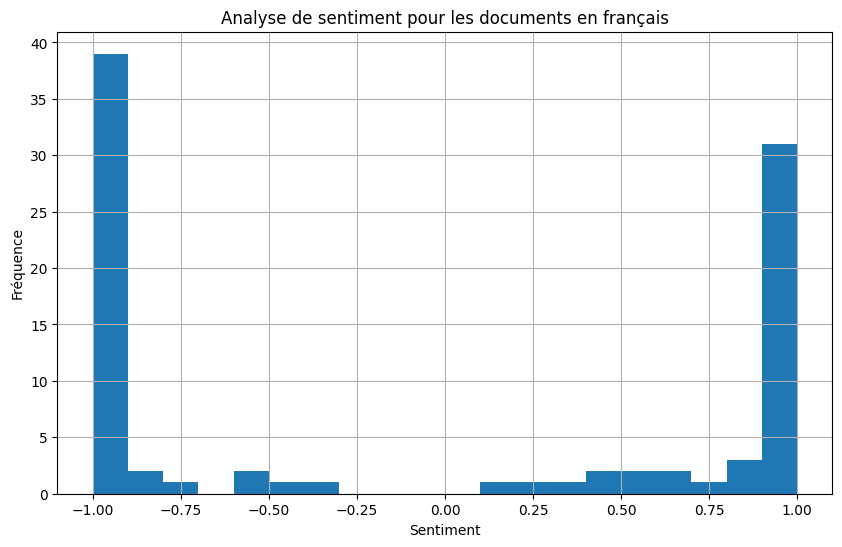

In [2]:
# Analyze documents by language
results = analyzer.analyze_docs_by_language('fr')
print(results['sentiment'].describe())

# Visualize sentiment distribution for documents in the selected language
plt.figure(figsize=(10, 6))
results['sentiment'].hist(bins=20)
plt.title("Analyse de sentiment pour les documents en français")
plt.xlabel("Sentiment")
plt.ylabel("Fréquence")
plt.show()

100%|██████████| 5/5 [00:00<00:00, 22.56it/s]


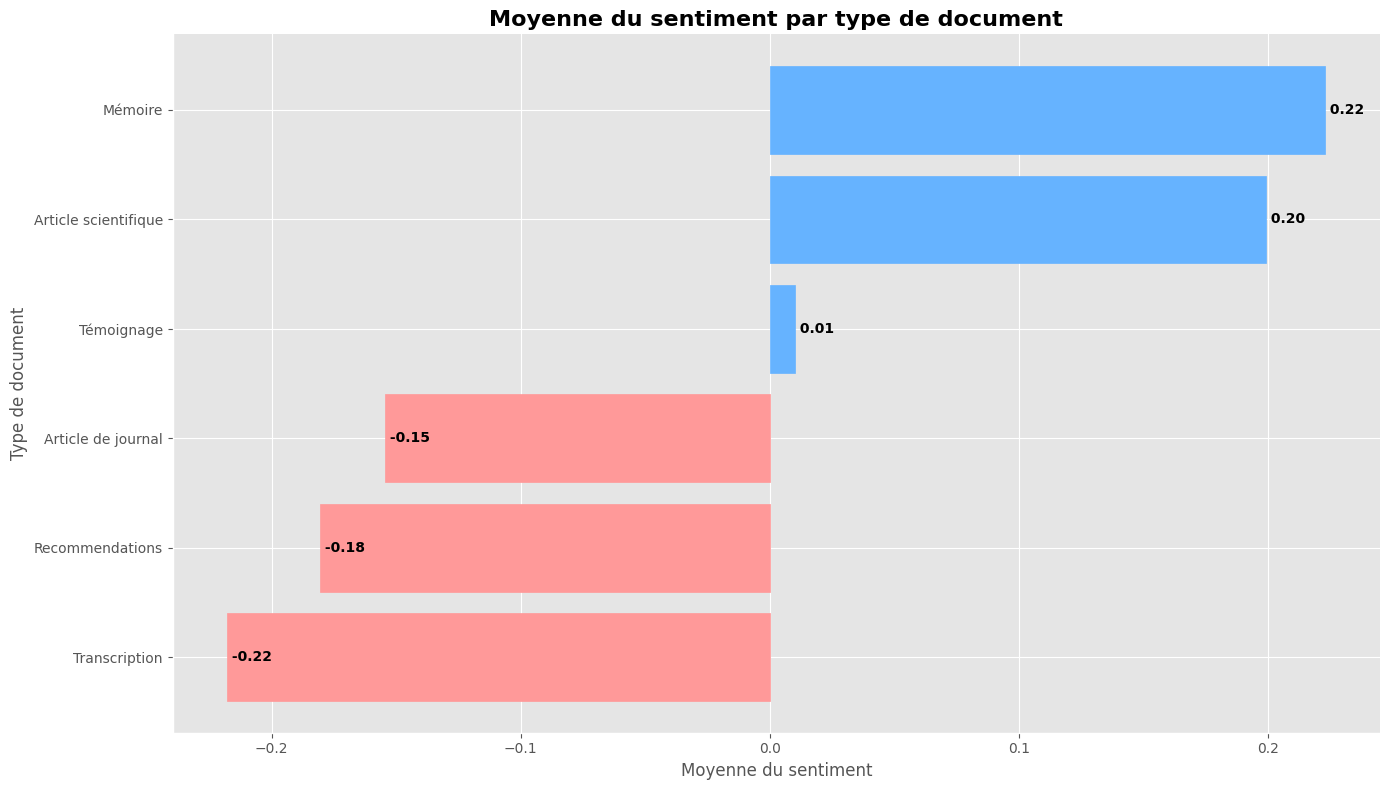

In [3]:
# Set the style for a more modern look
plt.style.use('ggplot')

# Calculate average sentiment by clientele
avg_sentiment_by_type = analyzer.get_avg_sentiment_by_category('document_type')

# Sort values for better visualization
avg_sentiment_by_type_sorted = avg_sentiment_by_type.sort_values(ascending=True)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data
bars = ax.barh(avg_sentiment_by_type_sorted.index, avg_sentiment_by_type_sorted.values)

# Color the bars based on sentiment (red for negative, blue for positive)
colors = ['#FF9999' if x < 0 else '#66B3FF' for x in avg_sentiment_by_type_sorted.values]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title("Moyenne du sentiment par type de document", fontsize=16, fontweight='bold')
ax.set_xlabel("Moyenne du sentiment", fontsize=12)
ax.set_ylabel("Type de document", fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels to the end of each bar
for i, v in enumerate(avg_sentiment_by_type_sorted.values):
    ax.text(v, i, f' {v:.2f}', va='center', fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()

100%|██████████| 5/5 [00:00<00:00, 25.08it/s]


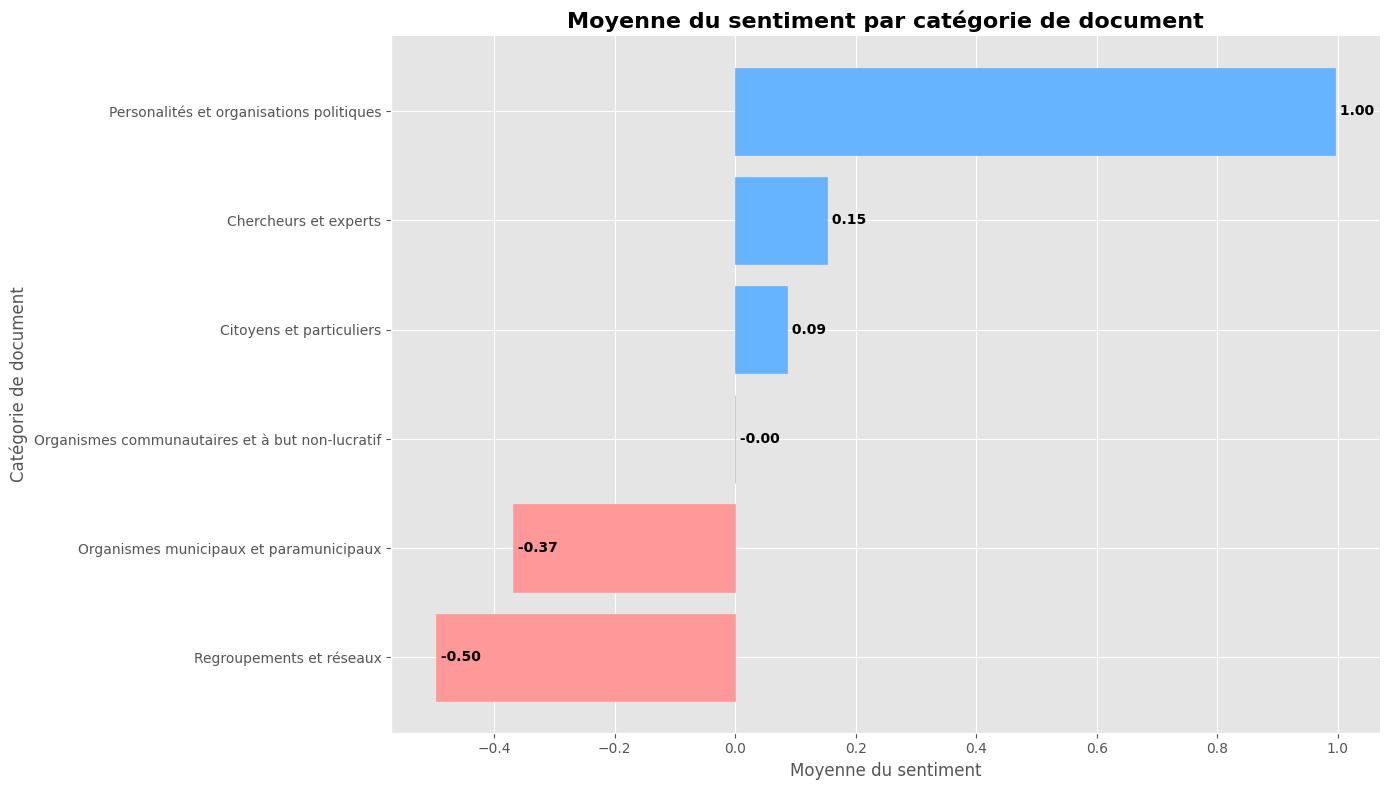

In [4]:
# Set the style for a more modern look
plt.style.use('ggplot')

# Calculate average sentiment by clientele
avg_sentiment_by_category = analyzer.get_avg_sentiment_by_category('category')

# Sort values for better visualization
avg_sentiment_by_category_sorted = avg_sentiment_by_category.sort_values(ascending=True)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data
bars = ax.barh(avg_sentiment_by_category_sorted.index, avg_sentiment_by_category_sorted.values)

# Color the bars based on sentiment (red for negative, blue for positive)
colors = ['#FF9999' if x < 0 else '#66B3FF' for x in avg_sentiment_by_category_sorted.values]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title("Moyenne du sentiment par catégorie de document", fontsize=16, fontweight='bold')
ax.set_xlabel("Moyenne du sentiment", fontsize=12)
ax.set_ylabel("Catégorie de document", fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels to the end of each bar
for i, v in enumerate(avg_sentiment_by_category_sorted.values):
    ax.text(v, i, f' {v:.2f}', va='center', fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()

100%|██████████| 5/5 [00:00<00:00, 24.61it/s]


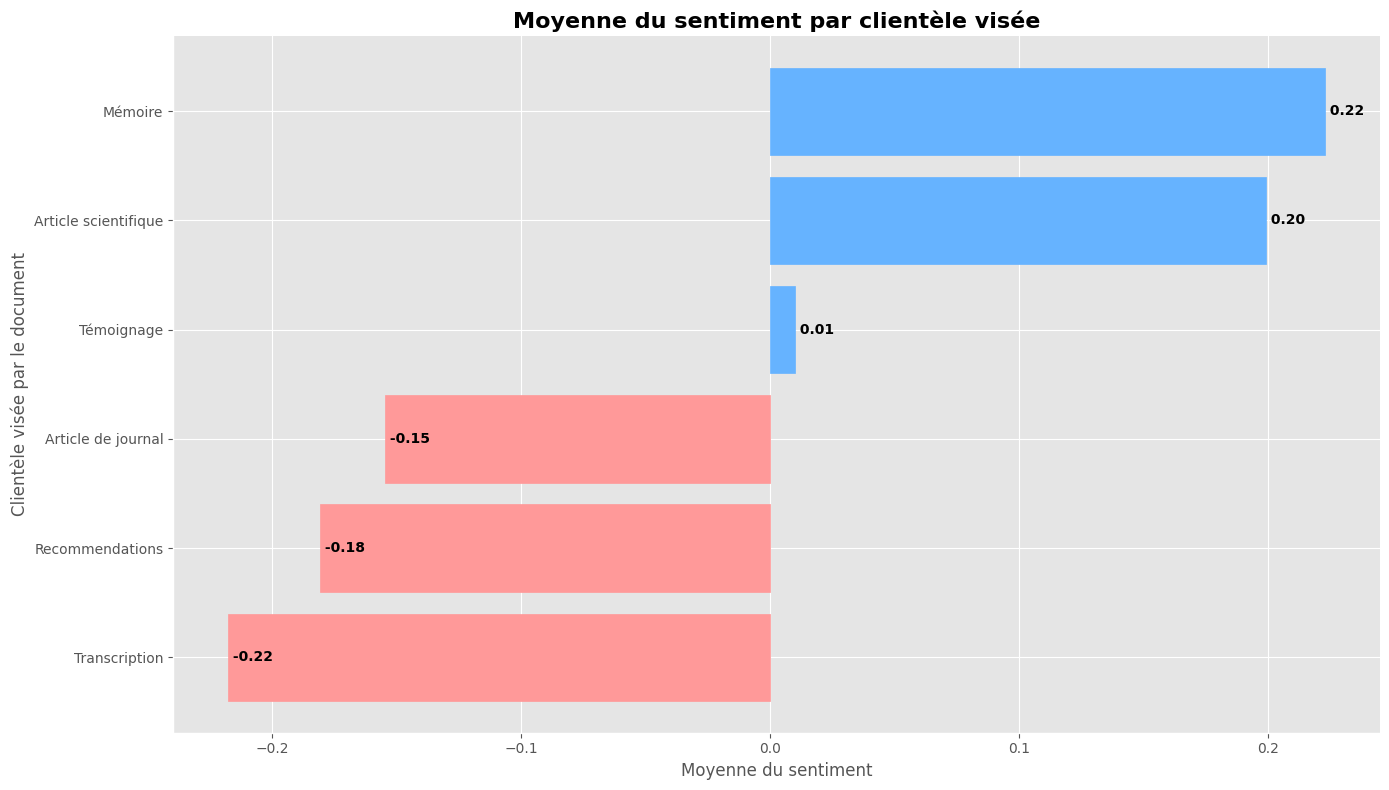

In [5]:
# Set the style for a more modern look
plt.style.use('ggplot')

# Calculate average sentiment by clientele
avg_sentiment_by_clientele = analyzer.get_avg_sentiment_by_category('clientele')

# Sort values for better visualization
avg_sentiment_by_clientele_sorted = avg_sentiment_by_type.sort_values(ascending=True)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data
bars = ax.barh(avg_sentiment_by_clientele_sorted.index, avg_sentiment_by_clientele_sorted.values)

# Color the bars based on sentiment (red for negative, blue for positive)
colors = ['#FF9999' if x < 0 else '#66B3FF' for x in avg_sentiment_by_clientele_sorted.values]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title("Moyenne du sentiment par clientèle visée", fontsize=16, fontweight='bold')
ax.set_xlabel("Moyenne du sentiment", fontsize=12)
ax.set_ylabel("Clientèle visée par le document", fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels to the end of each bar
for i, v in enumerate(avg_sentiment_by_clientele_sorted.values):
    ax.text(v, i, f' {v:.2f}', va='center', fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()